## Import data and modules

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
manhattan = pd.read_csv('manhattan.csv')

## Inspect data

In [5]:
manhattan.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


## Training set v. Test set
Use train_test_split from sklearn to split the dataset into -  <br> <br>
**training set**: data used to fit the model <br>
**test set**: the data used to test/evaluate the model <br> <br>

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2) <br>
train_size: the proportion of the dataset to include in the train split (between 0.0 and 1.0) <br>
test_size: the proportion of the dataset to include in the test split (between 0.0 and 1.0) <br>

In [40]:
# create DataFrames that select subset of columns from main DataFrame to use in regression model

# independent variables
x = manhattan[['bedrooms','bathrooms','size_sqft','min_to_subway','floor','building_age_yrs','no_fee','has_roofdeck','has_washer_dryer','has_doorman','has_elevator','has_dishwasher','has_patio','has_gym']]

# depedent variables
y = manhattan[['rent']]

,rent
0,2550
1,11500
2,4500
3,4795
4,17500
...,...
3534,4210
3535,6675
3536,1699
3537,3475


In [9]:
# split data into 80% training set and 20% testing set

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [12]:
# inspect results of train_test_split; expect 14 features from x set and 1 label for y set
# results meet expectations
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2831, 14)
(708, 14)
(2831, 1)
(708, 1)


## Define linear regression model

In [15]:
# create linear regression model
mlr = LinearRegression()

In [16]:
# fit model
mlr.fit(x_train, y_train) 

LinearRegression()

In [17]:
# use the model to predict y-values from x_test
y_predict = mlr.predict(x_test)

In [24]:
# print mlr coefficients
print(mlr.coef_)

[[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
    -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
    89.408889    -57.89714551  -19.31948556  -38.92369828]]


### How to the results from the model compare to an actual apartment listing?
https://streeteasy.com/rental/2177438

In [19]:
# define characteristics of apartment 
apartment_a = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
predict = mlr.predict(apartment_a)
print("Predicted rent: $%.2f" % predict)
print('Actual rent: $2000')

Predicted rent: $2393.58
Actual rent: $2000


## Visualize results

Text(0.5, 1.0, 'actual rent v. predicted rent')

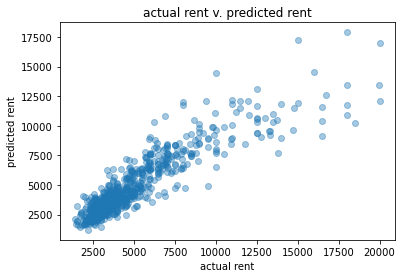

In [27]:
# Create a scatter plot
plt.scatter(y_test, y_predict, alpha=0.4)

# Create x-axis label and y-axis label
plt.xlabel("actual rent")
plt.ylabel("predicted rent")
 
# Create a title
plt.title("actual rent v. predicted rent")

Text(0.5, 1.0, 'square footage v. rent')

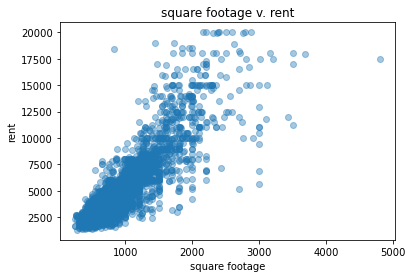

In [28]:
# Create a scatter plot
plt.scatter(manhattan[['size_sqft']], manhattan[['rent']], alpha=0.4)

# Create x-axis label and y-axis label
plt.xlabel("square footage")
plt.ylabel("rent")
 
# Create a title
plt.title("square footage v. rent")

Text(0.5, 1.0, 'minutes to subway v. rent')

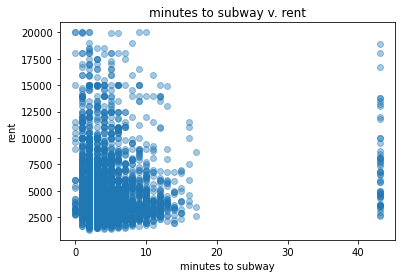

In [29]:
# Create a scatter plot
plt.scatter(manhattan[['min_to_subway']], manhattan[['rent']], alpha=0.4)

# Create x-axis label and y-axis label
plt.xlabel("minutes to subway")
plt.ylabel("rent")
 
# Create a title
plt.title("minutes to subway v. rent")

Text(0.5, 1.0, 'bedrooms v. rent')

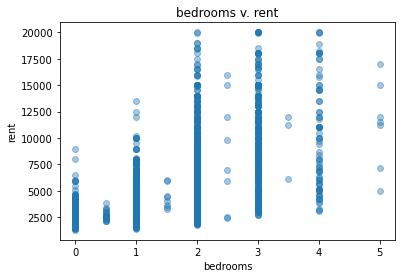

In [30]:
# Create a scatter plot
plt.scatter(manhattan[['bedrooms']], manhattan[['rent']], alpha=0.4)

# Create x-axis label and y-axis label
plt.xlabel("bedrooms")
plt.ylabel("rent")
 
# Create a title
plt.title("bedrooms v. rent")

Text(0.5, 1.0, 'building age v. rent')

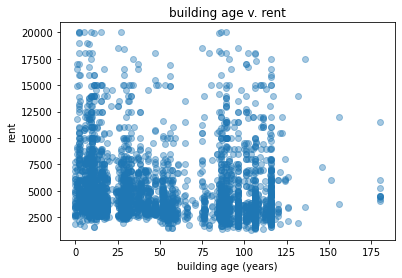

In [31]:
# Create a scatter plot
plt.scatter(manhattan[['building_age_yrs']], manhattan[['rent']], alpha=0.4)

# Create x-axis label and y-axis label
plt.xlabel("building age (years)")
plt.ylabel("rent")
 
# Create a title
plt.title("building age v. rent")

## Evaluate accuracy of model
**Residual Analysis**: The difference between the actual value y, and the predicted value ŷ is the residual e

In [34]:
# find the mean squared error regression loss for the training test
mlr.score(x_train, y_train)

0.7725460559817883

In [36]:
# find the mean squared error regression loss for the testing test
mlr.score(x_test, y_test)

0.8050371975357623